In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Basic Graph

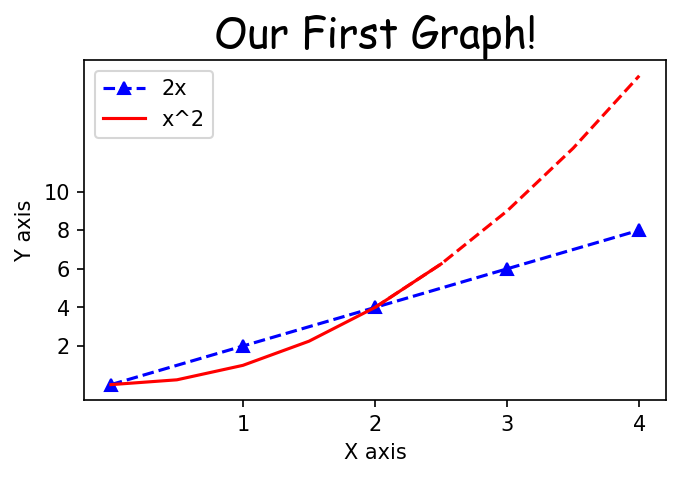

In [2]:
x = [0,1,2,3,4]
y = [0,2,4,6,8]

# Ressizing your graph
plt.figure(figsize=(5,3), dpi =150)

# plt.plot(x,y, label='2x',color = 'red',linewidth= 2, marker='o',markersize=5,markeredgecolor='blue')
# use short  hand notation
# fmt = '[color][marker][line]'

plt.plot(x,y, 'b^--',label='2x')

## Line 2
x2 = np.arange(0,4.5,0.5)
plt.plot(x2[:6],x2[:6]**2,'r',label ='x^2')
plt.plot(x2[4:],x2[4:]**2, 'r--')


plt.title("Our First Graph!", fontdict ={'fontname':'Comic Sans MS','fontsize':20})
plt.xlabel("X axis")
plt.ylabel("Y axis")

plt.xticks([1,2,3,4])
plt.yticks([2,4,6,8,10])

plt.legend()
plt.show()

## Bar Charts

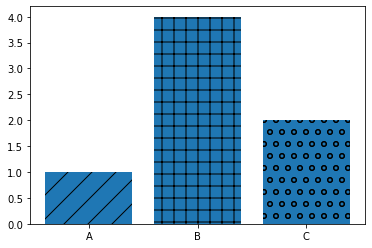

In [3]:
labels = ['A','B','C']
values = [1,4,2]

bars = plt.bar(labels,values)
patterns = ['/','+','o']
for bar in bars:
    bar.set_hatch(patterns.pop(0))
    
# bars[0].set_hatch('/')
# bars[1].set_hatch('\/')
# bars[2].set_hatch('+')

plt.show()

# Real World Examples

## Line graph

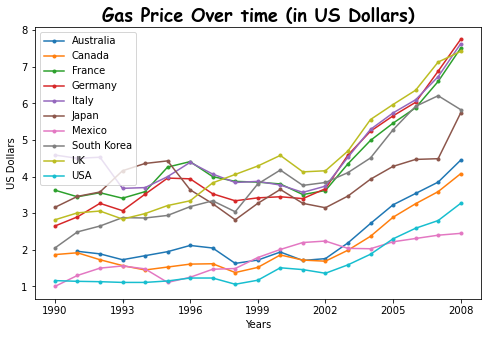

In [4]:
gas = pd.read_csv('gas_prices.csv')


colors = ['r','g','b','c','m','y','k','w']
plt.figure(figsize=(8,5))        

for country in gas:
    if country != 'Year':
        plt.plot(gas.Year,gas[country],marker='.',label = country)

plt.title('Gas Price Over time (in US Dollars)',fontdict ={'fontweight':'bold','fontname':'Comic Sans MS','fontsize':18})
plt.xticks(gas.Year[::3])
plt.xlabel('Years')
plt.ylabel('US Dollars')
plt.legend()
plt.savefig('Gas-Price.png',dpi=300)
plt.show()

## Load FIFA Data

In [7]:
fifa = pd.read_csv('fifa_data.csv')

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


## Histogram


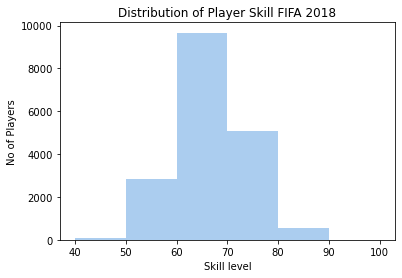

In [15]:
bins = [i for i in range(40,110,10)]
plt.hist(fifa.Overall,bins=bins,color="#abcdef")
plt.xticks(bins)
plt.xlabel('Skill level')
plt.ylabel('No of Players')
plt.title('Distribution of Player Skill FIFA 2018')
plt.show()

## Pie Charts

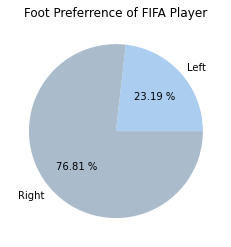

In [40]:
left = fifa[fifa['Preferred Foot'] == 'Left'].count()[0]
right = fifa[fifa['Preferred Foot'] == 'Right'].count()[0]

labels = ['Left','Right']
colors = ['#abcdef','#aabbcc']
plt.pie([left,right],labels = labels,colors=colors,autopct='%.2f %%')
plt.title('Foot Preferrence of FIFA Player')
plt.show()

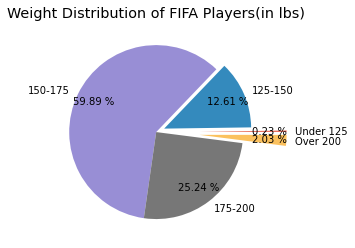

In [63]:
fifa.Weight = [int(x.strip('lbs')) if type(x) == str else x for x in fifa.Weight  ]

plt.style.use('ggplot')

light = fifa.loc[fifa.Weight < 125].count()[0]
light_medium = fifa[(fifa.Weight >= 125) & (fifa.Weight < 150)].count()[0]
medium = fifa[(fifa.Weight >= 150) & (fifa.Weight < 175)].count()[0]
medium_heavy = fifa[(fifa.Weight >= 175) & (fifa.Weight < 200)].count()[0]
heavy = fifa[fifa.Weight >= 200].count()[0]

weights = [light,light_medium,medium,medium_heavy,heavy]
labels = ['Under 125','125-150','150-175','175-200','Over 200']
explode = [0.5,0.1,0,0,0.5]
plt.pie(weights,labels = labels, autopct = '%.2f %%', pctdistance = 0.8, explode = explode)

plt.title('Weight Distribution of FIFA Players(in lbs)')
plt.show()

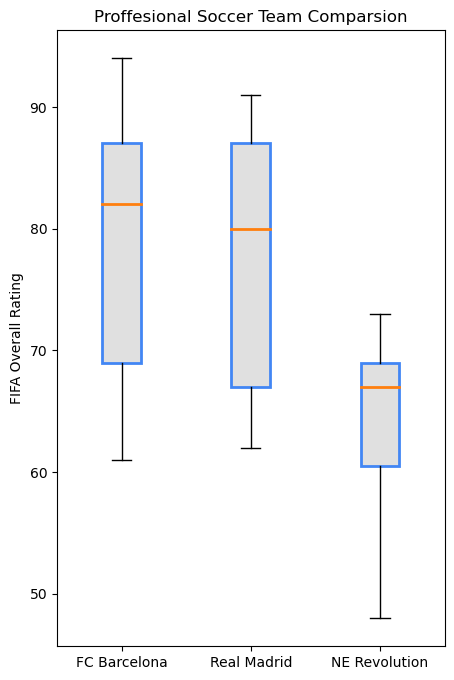

In [80]:
plt.style.use('default')
barcelona = fifa[fifa.Club == 'FC Barcelona']['Overall']
madrid = fifa[fifa.Club == 'Real Madrid']['Overall']
revs =  fifa[fifa.Club == 'New England Revolution']['Overall']

plt.figure(figsize=(5,8))
clubs = [barcelona,madrid,revs]
labels = ['FC Barcelona','Real Madrid','NE Revolution']
bp = plt.boxplot(clubs,labels = labels, patch_artist=True, medianprops={'linewidth': 2})

for box in bp['boxes']:
    # change outline color
    box.set(color='#4286f4', linewidth=2)
    # change fill color
    box.set(facecolor = '#e0e0e0' )
    # change hatch
    #box.set(hatch = '/')
    
plt.title('Proffesional Soccer Team Comparsion')
plt.ylabel('FIFA Overall Rating')
plt.show()